In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from my_class import ParticleSwarmMinimization

In [2]:
def himmelblau(x: np.ndarray or list) -> float:
    """ Function for evaluating the Himmelblau function.
    
    Parameters:
    -----------
        x: np.ndarray or list
    
    Returns:
    --------
        result: float

     """
    result = np.power((np.power(x[0],2)+x[1]-11),2)+np.power((x[0]+np.power(x[1],2)-7),2)
    return result

In [3]:
f = himmelblau

Nr_dimensions = 2
Nr_particles  = 5000
Nr_iterations = 50

w, phi_p, phi_g  = 0.1, 0.1, 0.35
x_lower, x_upper = -6, 6
y_lower, y_upper = -6, 6

dimensions_bounds = np.array([[x_lower, x_upper],[y_lower, y_upper]])

In [4]:
my_sim = ParticleSwarmMinimization(f=f, Nr_dimensions=Nr_dimensions, Nr_particles=Nr_particles, \
                                    Nr_iterations=Nr_iterations,w=w,phi_p=phi_p,phi_g=phi_g, dimensions_lims=dimensions_bounds)
my_sim.simulate()

--------------------Initializing positions & velocities--------------------


100%|██████████| 2/2 [00:00<00:00, 1600.27it/s]


--------------------Performing iteration steps--------------------


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


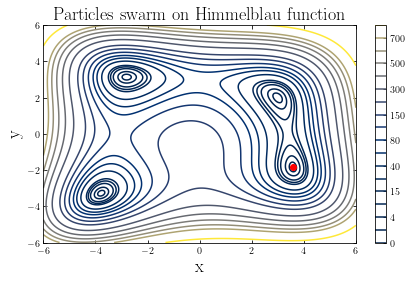

In [5]:
plt.rc('text', usetex=True)
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

## Defining x- & y-limits for plot ##
xlims, ylims = [-6.0,6.0], [-6.0,6.0]

## Determining levels in function: i.e. Z = 0, 1, 4, 10.... ##
levels = [0,1,4,10,15,20,40,60,80,110,150,200,300,400,500,600,700,1000]

## Setting values for  contourplot ##
xlist = np.linspace(xlims[0],xlims[1],1000)
ylist = np.linspace(ylims[0],ylims[1],1000)
X, Y = np.meshgrid(xlist,ylist)
Z = np.power((np.power(X,2)+Y-11),2)+np.power((X+np.power(Y,2)-7),2)

color_maps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

## Defining plot ##
fig, ax = plt.subplots(1,1,figsize = (7,4))
ax.set_title('Particles swarm on Himmelblau function',size=18)
contour_plot = ax.contour(X,Y,Z, levels, antialiased=True,cmap = plt.get_cmap(color_maps[-1]))
fig.colorbar(contour_plot)
ax.set_xlim(xlims[0],xlims[1]), ax.set_ylim(ylims[0],ylims[1])
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)
ax.plot(my_sim.best_position[0],my_sim.best_position[1],'ro')
plt.show()

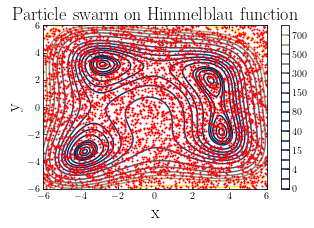

In [6]:

fig, ax = plt.subplots(1,1,figsize = (5,3))
ax.set_title('Particle swarm on Himmelblau function',size=18)
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)


contour_plot = ax.contour(X,Y,Z, levels, antialiased=True, cmap = plt.get_cmap(color_maps[-1]))
fig.colorbar(contour_plot)

generations, = ax.plot([],[],'o',color='r',ms = 1,label='ith generation')


def update(i):
    generations.set_data(my_sim.position_history[i][:,0],my_sim.position_history[i][:,1])

    return generations, 


ax.set_xlim(xlims[0],xlims[1])
ax.set_ylim(ylims[0],ylims[1])


anim = animation.FuncAnimation(fig,
                               update,
                               frames       = len(my_sim.position_history),
                               interval     = 70,
                               blit         = True,
                               repeat_delay = 0)
# Set up formatting for the movie files

## uncomment below to save mp4 ##
#writervideo = animation.FFMpegWriter(fps=5)
#anim.save("ParticleSwarm.mp4", dpi=450, writer=writervideo)   
